### Import Libraries

In [41]:
# to load, access, process and dump json files
import json
# regular expression
import re
# to parse HTML contents
from bs4 import BeautifulSoup

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns
# to create word clouds
from wordcloud import WordCloud, STOPWORDS 
# to eliminate stopwords
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for machine learning
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# for deep learning 
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences
#word2vec
from gensim.models import Word2Vec


### Dataset

In [10]:
train = pd.read_csv("C:/Users/serin/Desktop/data_/train.csv")
test = pd.read_csv("C:/Users/serin/Desktop/data_/test_x.csv")
print('No. of rows and columns :', train.shape)
train.head()
test.head()

No. of rows and columns : (54879, 3)


,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...


**(1) nltk 불용어 제거**

In [12]:
# Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
my_stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
nltk_stopwords = set(stopwords.words('english'))

stopwords_list = my_stopwords + stopwords.words('english') 
stopwords_list = list(set(stopwords_list))


stopwords = nltk_stopwords.union(my_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


nltk의 word_tokenize는 we've의 경우 we 와 've 로 두개의 토큰으로 that's 의 경우 that 과 's 로 두개의 토큰으로 분리하여 위의 불용어 리스트를 활용하면 제거를 한다고 해도 제대로 제거가 되지 않을 것  

그래서 불용어도 nltk의 word_tokenize를 활용해 한 번 분리를 한 형태를 활용

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
nltk_fit_stopwords = [] 
for stopword in stopwords_list:
    tokens = nltk.word_tokenize(stopword) 
    for token in tokens: 
        nltk_fit_stopwords.append(token) 

nltk_fit_stopwords = [token.lower() for token in nltk_fit_stopwords]

In [15]:
#위에서 만든 불용어를 활용해 특수문자와 불용어를 제거한 토큰을 남기는 함수 생성
from tqdm import tqdm
import re 
def alpha_num(text): 
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\“\”\'\"…》]', '', text) 
    return re.sub(r"[^A-Za-z0-9]\'", ' ', text) 

def get_clean_tokens(text_list, stopwords_list):
    clean_tokens = [] 
    
    for i in tqdm(range(len(text_list))): 
        text = text_list[i].lower() 
        word_tokens = nltk.word_tokenize(text)
        word_tokens = [ alpha_num(token) for token in word_tokens if token not in nltk_fit_stopwords]
        word_tokens = [word for word in word_tokens if len(word) > 1] 
        
        clean_tokens.append(word_tokens) 
        
    return clean_tokens

In [16]:
train_text = list(train['text']) 
test_text = list(test['text'])

train_tokens = get_clean_tokens(train_text, stopwords_list) 
text_tokens = get_clean_tokens(test_text, stopwords_list)

100%|███████████████████████████████████████████████████████████████████████████| 19617/19617 [00:27<00:00, 707.73it/s]


In [17]:
word_list = [] 
for i in tqdm(range(len(train_tokens))): 
    for j in range(len(train_tokens[i])): 
        word_list.append(train_tokens[i][j])

vocab_size = len(list(set(word_list))) 
print(vocab_size)

100%|████████████████████████████████████████████████████████████████████████| 54879/54879 [00:00<00:00, 171758.87it/s]


41255


In [18]:
from keras_preprocessing.text import Tokenizer #tokenizer에 fit
tokenizer = Tokenizer()#, oov_token=oov_tok) 
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index

**단어의 빈도에 따른 전처리** 

In [19]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트 
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합 
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다. 
for key, value in tokenizer.word_counts.items(): 
    total_freq = total_freq + value
    
    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1 
        rare_freq = rare_freq + value
        
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100) 
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 42330
등장 빈도가 1번 이하인 희귀 단어의 수: 16347
단어 집합에서 희귀 단어의 비율: 38.61800141743444
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.6867015891552651


In [20]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2 
vocab_size = total_cnt - rare_cnt + 2 
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 25985


In [21]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(train_text) 
X_train = tokenizer.texts_to_sequences(train_text)
X_test = tokenizer.texts_to_sequences(test_text)

In [22]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if len(s) <= max_len:
            cnt = cnt + 1 
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 390
below_threshold_len(max_len,X_train)

전체 샘플 중 길이가 390 이하인 샘플의 비율: 99.99271123744965


**길이를 동일하게 Padding 하기**

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len) 

import numpy as np 
y_train = np.array([x for x in train['author']]) 
print(vocab_size)

25985


# XGBOOST

In [26]:
#Import more libraries

!pip install textstat
!pip install fasttext

from textstat import flesch_reading_ease
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics, model_selection, naive_bayes
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk import word_tokenize, pos_tag, ne_chunk, tree2conlltags
import fasttext
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\serin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\User

True

In [27]:
# sent2vec 활용 embedding
def sent2vec(s):
    words = nltk.tokenize.word_tokenize(s)
    #words = [k.stem(w) for w in words]
    #words = [w for w in words if not w in string.digits]
    #words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(model_ft[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v

xtrain_ft = np.array([sent2vec(x) for x in train['text']])
xtest_ft = np.array([sent2vec(x) for x in test['text']])

train_ft=pd.DataFrame(xtrain_ft)
train_ft.columns = ['ft_vector_'+str(i) for i in range(xtrain_ft.shape[1])]

test_ft=pd.DataFrame(xtest_ft)
test_ft.columns = ['ft_vector_'+str(i) for i in range(xtrain_ft.shape[1])]

train = pd.concat([train, train_ft], axis=1)
test = pd.concat([test, test_ft], axis=1)

In [30]:
# Logistic Regression - (1) TF-IDF 활용
tfidf_vec = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words('english'), ngram_range=(1, 3), min_df=50)
train_tfidf = tfidf_vec.fit_transform(train['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test['text'].values.tolist())
train_y = train['author']

def runLR(train_X,train_y,test_X,test_y,test_X2):
    model=LogisticRegression()
    model.fit(train_X,train_y)
    pred_test_y=model.predict_proba(test_X)
    pred_test_y2=model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model


cv_scores=[]
cols_to_drop=['text','index']
train_X = train.drop(cols_to_drop+['author'], axis=1)
train_y=train['author']
test_X = test.drop(cols_to_drop, axis=1)
pred_train=np.zeros([train.shape[0],5])
pred_full_test = 0

cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for dev_index, val_index in cv.split(train_X,train_y):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runLR(dev_X, dev_y, val_X, val_y,test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

train["tfidf_LR_0"] = pred_train[:,0]
train["tfidf_LR_1"] = pred_train[:,1]
train["tfidf_LR_2"] = pred_train[:,2]
train["tfidf_LR_3"] = pred_train[:,3]
train["tfidf_LR_4"] = pred_train[:,4]
test["tfidf_LR_0"] = pred_full_test[:,0]
test["tfidf_LR_1"] = pred_full_test[:,1]
test["tfidf_LR_2"] = pred_full_test[:,2]
test["tfidf_LR_3"] = pred_full_test[:,3]
test["tfidf_LR_4"] = pred_full_test[:,4]

# Logistic Regression - (2) CountVectorizer 활용
cvec_vec=CountVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words('english'), ngram_range=(1, 3), min_df=50)
cvec_vec.fit(train['text'].values.tolist())
train_cvec = cvec_vec.transform(train['text'].values.tolist())
test_cvec = cvec_vec.transform(test['text'].values.tolist())

cv_scores=[]
cols_to_drop=['text','index']
train_X = train.drop(cols_to_drop+['author'], axis=1)
train_y=train['author']
test_X = test.drop(cols_to_drop, axis=1)
pred_train=np.zeros([train.shape[0],5])
pred_full_test = 0

cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for dev_index, val_index in cv.split(train_X,train_y):
    dev_X, val_X = train_cvec[dev_index], train_cvec[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runLR(dev_X, dev_y, val_X, val_y,test_cvec)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

train["cvec_LR_0"] = pred_train[:,0]
train["cvec_LR_1"] = pred_train[:,1]
train["cvec_LR_2"] = pred_train[:,2]
train["cvec_LR_3"] = pred_train[:,3]
train["cvec_LR_4"] = pred_train[:,4]
test["cvec_LR_0"] = pred_full_test[:,0]
test["cvec_LR_1"] = pred_full_test[:,1]
test["cvec_LR_2"] = pred_full_test[:,2]
test["cvec_LR_3"] = pred_full_test[:,3]
test["cvec_LR_4"] = pred_full_test[:,4]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs fa

Mean cv score :  0.6793511813779939


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver

Mean cv score :  0.6609595457334769


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
train.head()

,index,text,author,ft_vector_0,ft_vector_1,ft_vector_2,ft_vector_3,ft_vector_4,ft_vector_5,ft_vector_6,...,tfidf_LR_0,tfidf_LR_1,tfidf_LR_2,tfidf_LR_3,tfidf_LR_4,cvec_LR_0,cvec_LR_1,cvec_LR_2,cvec_LR_3,cvec_LR_4
0,0,"He was almost choking. There was so much, so m...",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.075877,0.035700,0.022182,0.833310,0.032931,3.702075e-03,1.101278e-03,5.580499e-04,9.939627e-01,6.759153e-04
1,1,"“Your sister asked for it, I suppose?”",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.336796,0.378455,0.044617,0.200717,0.039415,5.281849e-01,2.850943e-01,1.522189e-02,1.602757e-01,1.122320e-02
2,2,"She was engaged one day as she walked, in per...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057485,0.932075,0.001597,0.007465,0.001378,1.199645e-05,9.999879e-01,1.685501e-09,8.094511e-08,6.755655e-10
3,3,"The captain was in the porch, keeping himself ...",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011476,0.005192,0.064296,0.002829,0.916207,9.565941e-07,2.003313e-07,3.820260e-04,3.261215e-08,9.996168e-01
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004025,0.000758,0.001995,0.990822,0.002400,9.217776e-07,5.622939e-08,3.613226e-07,9.999986e-01,6.670245e-08


In [31]:
# SGD Classifier - (1) TF-IDF 활용
tfidf_vec = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words('english'), ngram_range=(1, 3), min_df=50)

train_tfidf = tfidf_vec.fit_transform(train['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test['text'].values.tolist())
train_y = train['author']

def runSGD(train_X,train_y,test_X,test_y,test_X2):
    model=SGDClassifier(loss='log')
    model.fit(train_X,train_y)
    pred_test_y=model.predict_proba(test_X)
    pred_test_y2=model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

cv_scores=[]
cols_to_drop=['text','index']
train_X = train.drop(cols_to_drop+['author'], axis=1)
train_y=train['author']
test_X = test.drop(cols_to_drop, axis=1)
pred_train=np.zeros([train.shape[0],5])
pred_full_test = 0

cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for dev_index, val_index in cv.split(train_X,train_y):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runSGD(dev_X, dev_y, val_X, val_y,test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

train["tfidf_SGD_0"] = pred_train[:,0]
train["tfidf_SGD_1"] = pred_train[:,1]
train["tfidf_SGD_2"] = pred_train[:,2]
train["tfidf_SGD_3"] = pred_train[:,3]
train["tfidf_SGD_4"] = pred_train[:,4]
test["tfidf_SGD_0"] = pred_full_test[:,0]
test["tfidf_SGD_1"] = pred_full_test[:,1]
test["tfidf_SGD_2"] = pred_full_test[:,2]
test["tfidf_SGD_3"] = pred_full_test[:,3]
test["tfidf_SGD_4"] = pred_full_test[:,4]

# SGD Classifier - (2) CountVectorizer 활용
cvec_char_vec = CountVectorizer(ngram_range=(1,7), analyzer='char')
cvec_char_vec.fit(train['text'].values.tolist())
train_cvec_char = cvec_char_vec.transform(train['text'].values.tolist())
test_cvec_char = cvec_char_vec.transform(test['text'].values.tolist())

cv_scores=[]
cols_to_drop=['text','index']
train_X = train.drop(cols_to_drop+['author'], axis=1)
train_y=train['author']
test_X = test.drop(cols_to_drop, axis=1)
pred_train=np.zeros([train.shape[0],5])
pred_full_test = 0

cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for dev_index, val_index in cv.split(train_X,train_y):
    dev_X, val_X = train_cvec_char[dev_index], train_cvec_char[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runSGD(dev_X, dev_y, val_X, val_y,test_cvec_char)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

train["cvec_char_SGD_0"] = pred_train[:,0]
train["cvec_char_SGD_1"] = pred_train[:,1]
train["cvec_char_SGD_2"] = pred_train[:,2]
train["cvec_char_SGD_3"] = pred_train[:,3]
train["cvec_char_SGD_4"] = pred_train[:,4]
test["cvec_char_SGD_0"] = pred_full_test[:,0]
test["cvec_char_SGD_1"] = pred_full_test[:,1]
test["cvec_char_SGD_2"] = pred_full_test[:,2]
test["cvec_char_SGD_3"] = pred_full_test[:,3]
test["cvec_char_SGD_4"] = pred_full_test[:,4]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Mean cv score :  0.883483410696884
Mean cv score :  1.5153734769989802


In [33]:
# RandomForestClassifier -  TF-IDF 활용
tfidf_vec = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words('english'), ngram_range=(1, 3), min_df=50)

train_tfidf = tfidf_vec.fit_transform(train['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test['text'].values.tolist())
train_y = train['author']

def runRF(train_X,train_y,test_X,test_y,test_X2):
    model=RandomForestClassifier()
    model.fit(train_X,train_y)
    pred_test_y=model.predict_proba(test_X)
    pred_test_y2=model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model


cv_scores=[]
cols_to_drop=['text','index']
train_X = train.drop(cols_to_drop+['author'], axis=1)
train_y=train['author']
test_X = test.drop(cols_to_drop, axis=1)
pred_train=np.zeros([train.shape[0],5])
pred_full_test = 0

cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

for dev_index, val_index in cv.split(train_X,train_y):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runRF(dev_X, dev_y, val_X, val_y,test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

train["tfidf_RF_0"] = pred_train[:,0]
train["tfidf_RF_1"] = pred_train[:,1]
train["tfidf_RF_2"] = pred_train[:,2]
train["tfidf_RF_3"] = pred_train[:,3]
train["tfidf_RF_4"] = pred_train[:,4]
test["tfidf_RF_0"] = pred_full_test[:,0]
test["tfidf_RF_1"] = pred_full_test[:,1]
test["tfidf_RF_2"] = pred_full_test[:,2]
test["tfidf_RF_3"] = pred_full_test[:,3]
test["tfidf_RF_4"] = pred_full_test[:,4]




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Mean cv score :  0.9692561375828612


In [ ]:
# countvectorization Random Forest 방식으로, 너무 시간이 오래 걸려서 생략
#cvec_char_vec = CountVectorizer(ngram_range=(1,7), analyzer='char')
#cvec_char_vec.fit(train['text'].values.tolist())
#train_cvec_char = cvec_char_vec.transform(train['text'].values.tolist())
#test_cvec_char = cvec_char_vec.transform(test['text'].values.tolist())

#cv_scores=[]
#cols_to_drop=['text','index']
#train_X = train.drop(cols_to_drop+['author'], axis=1)
#train_y=train['author']
#test_X = test.drop(cols_to_drop, axis=1)
#pred_train=np.zeros([train.shape[0],5])
#pred_full_test = 0

#cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

#for dev_index, val_index in cv.split(train_X,train_y):
   # dev_X, val_X = train_cvec_char[dev_index], train_cvec_char[val_index]
    #dev_y, val_y = train_y[dev_index], train_y[val_index]
    #pred_val_y, pred_test_y, model = runRF(dev_X, dev_y, val_X, val_y,test_cvec_char)
    #pred_full_test = pred_full_test + pred_test_y
    #pred_train[val_index,:] = pred_val_y
    #cv_scores.append(metrics.log_loss(val_y, pred_val_y))
#print("Mean cv score : ", np.mean(cv_scores))
#pred_full_test = pred_full_test / 5.

#train["cvec_char_RF_0"] = pred_train[:,0]
#train["cvec_char_RF_1"] = pred_train[:,1]
#train["cvec_char_RF_2"] = pred_train[:,2]
#train["cvec_char_RF_3"] = pred_train[:,3]
#train["cvec_char_RF_4"] = pred_train[:,4]
#test["cvec_char_RF_0"] = pred_full_test[:,0]
#test["cvec_char_RF_1"] = pred_full_test[:,1]
#test["cvec_char_RF_2"] = pred_full_test[:,2]
#test["cvec_char_RF_3"] = pred_full_test[:,3]
#test["cvec_char_RF_4"] = pred_full_test[:,4]

In [37]:
tfidf_vec=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf= tfidf_vec.fit_transform(train['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test['text'].values.tolist())

n_comp = 20
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(train_tfidf)

train_svd = svd_obj.transform(train_tfidf)
test_svd = svd_obj.transform(test_tfidf)

from sklearn import preprocessing
scl = preprocessing.StandardScaler()
scl.fit(train_svd)
train_svd_scl = pd.DataFrame(scl.transform(train_svd))
test_svd_scl = pd.DataFrame(scl.transform(test_svd))

train_svd_scl.columns = ['svd_word_'+str(i) for i in range(n_comp)]
test_svd_scl.columns = ['svd_word_'+str(i) for i in range(n_comp)]
train = pd.concat([train, train_svd_scl], axis=1)
test = pd.concat([test, test_svd_scl], axis=1)

In [34]:
# Naive Bayes model
def runMNB(train_X,train_y,test_X,test_y,test_X2):
    model=naive_bayes.MultinomialNB()
    model.fit(train_X,train_y)
    pred_test_y=model.predict_proba(test_X)
    pred_test_y2=model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

Count_vec=CountVectorizer(stop_words='english',ngram_range=(1,3))

Count_vec.fit(train['text'].values.tolist())
train_Count = Count_vec.transform(train['text'].values.tolist())
test_Count = Count_vec.transform(test['text'].values.tolist())

cv_scores=[]
pred_train=np.zeros([train.shape[0],5])
pred_full_test = 0

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2020)

for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_Count[dev_index], train_Count[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y,test_Count)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

train["nb_cvec_0"] = pred_train[:,0]
train["nb_cvec_1"] = pred_train[:,1]
train["nb_cvec_2"] = pred_train[:,2]
train["nb_cvec_3"] = pred_train[:,3]
train["nb_cvec_4"] = pred_train[:,4]
test["nb_cvec_0"] = pred_full_test[:,0]
test["nb_cvec_1"] = pred_full_test[:,1]
test["nb_cvec_2"] = pred_full_test[:,2]
test["nb_cvec_3"] = pred_full_test[:,3]
test["nb_cvec_4"] = pred_full_test[:,4]

Mean cv score :  1.0237504297527562


In [36]:
cvec_char_vec = CountVectorizer(ngram_range=(1,7), analyzer='char')
cvec_char_vec.fit(train['text'].values.tolist())
train_cvec_char = cvec_char_vec.transform(train['text'].values.tolist())
test_cvec_char = cvec_char_vec.transform(test['text'].values.tolist())

cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train.shape[0], 5])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2020)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_cvec_char[dev_index], train_cvec_char[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_cvec_char)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

train["nb_cvec_char_0"] = pred_train[:,0]
train["nb_cvec_char_1"] = pred_train[:,1]
train["nb_cvec_char_2"] = pred_train[:,2]
train["nb_cvec_char_3"] = pred_train[:,3]
train["nb_cvec_char_4"] = pred_train[:,4]
test["nb_cvec_char_0"] = pred_full_test[:,0]
test["nb_cvec_char_1"] = pred_full_test[:,1]
test["nb_cvec_char_2"] = pred_full_test[:,2]
test["nb_cvec_char_3"] = pred_full_test[:,3]
test["nb_cvec_char_4"] = pred_full_test[:,4]

Mean cv score :  5.360513297314131


In [35]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,5), analyzer='char')

train_tfidf = tfidf_vec.fit_transform(train['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test['text'].values.tolist())

cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train.shape[0], 5])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2020)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.


train["nb_tfidf_char_0"] = pred_train[:,0]
train["nb_tfidf_char_1"] = pred_train[:,1]
train["nb_tfidf_char_2"] = pred_train[:,2]
train["nb_tfidf_char_3"] = pred_train[:,3]
train["nb_tfidf_char_4"] = pred_train[:,4]
test["nb_tfidf_char_0"] = pred_full_test[:,0]
test["nb_tfidf_char_1"] = pred_full_test[:,1]
test["nb_tfidf_char_2"] = pred_full_test[:,2]
test["nb_tfidf_char_3"] = pred_full_test[:,3]
test["nb_tfidf_char_4"] = pred_full_test[:,4]

Mean cv score :  1.6974170014530536


In [38]:
# SVD 
n_comp = 20
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(train_tfidf)

train_svd = svd_obj.transform(train_tfidf)
test_svd = svd_obj.transform(test_tfidf)

from sklearn import preprocessing
scl = preprocessing.StandardScaler()
scl.fit(train_svd)
train_svd_scl = pd.DataFrame(scl.transform(train_svd))
test_svd_scl = pd.DataFrame(scl.transform(test_svd))

train_svd_scl.columns = ['svd_char_'+str(i) for i in range(n_comp)]
test_svd_scl.columns = ['svd_char_'+str(i) for i in range(n_comp)]
train = pd.concat([train, train_svd_scl], axis=1)
test = pd.concat([test, test_svd_scl], axis=1)

In [62]:
## Now Goes to XGBoost!

cols_to_drop = ['index', 'text']
train_X = train.drop(cols_to_drop+['author'], axis=1)
train_y=train['author']
test_index = test['index'].values
test_X = test.drop(cols_to_drop, axis=1)
xgb_preds=[]
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2020)

for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    
    dtrain = xgb.DMatrix(dev_X,label=dev_y)
    dvalid = xgb.DMatrix(val_X, label=val_y)
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
   
    
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 3
    param['silent'] = 1
    param['num_class'] = 5
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.8
    param['colsample_bytree'] = 0.3
    param['seed'] = 0
    param['gpu_id'] = 0
    #param['tree_method'] = 'gpu_hist'
    #param['updater'] = 'grow_gpu'

    model = xgb.train(param, dtrain, 2000, watchlist, early_stopping_rounds=50, verbose_eval=20,
                     )

    xgtest2 = xgb.DMatrix(test_X)
    xgb_pred = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    xgb_preds.append(list(xgb_pred))
#  tree_method = 'gpu_hist'
#out_df = pd.DataFrame(pred_full_test)
#out_df.columns = ['0','1','2','3','4']
#out_df.insert(0, 'index', test_index)
#out_df.to_csv("submission.csv", index=False)

[14:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:222: No visible GPU is found, setting `gpu_id` to -1
[14:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.47090	valid-mlogloss:1.47034
[20]	train-mlogloss:0.56349	valid-mlogloss:0.56504
[40]	train-mlogloss:0.43860	valid-mlogloss:0.44449
[60]	train-mlogloss:0.40483	valid-mlogloss:0.41591
[80]	train-mlogloss:0.38792	valid-mlogloss:0.40467
[100]	train-mlogloss:0.37591	valid-mlogloss:0.39826
[120]	train-mlogloss:0.36621	valid-mlogloss:0.39347
[140]	train-mlogloss:0.35799	valid-mlogloss:0.39023
[160]	train-mlogloss:0.35084	valid-mlogloss:0.38824
[180]

In [65]:
#exporting submission file

for i in range(len(xgb_preds[0])):
    sum=0
    for j in range(5):
        sum+=xgb_preds[j][i]    
    if(i==0):
        preds=sum/5
    else:
        preds=np.vstack([preds,sum/5])

preds=pd.DataFrame(preds)

preds.to_csv('submission5.csv')

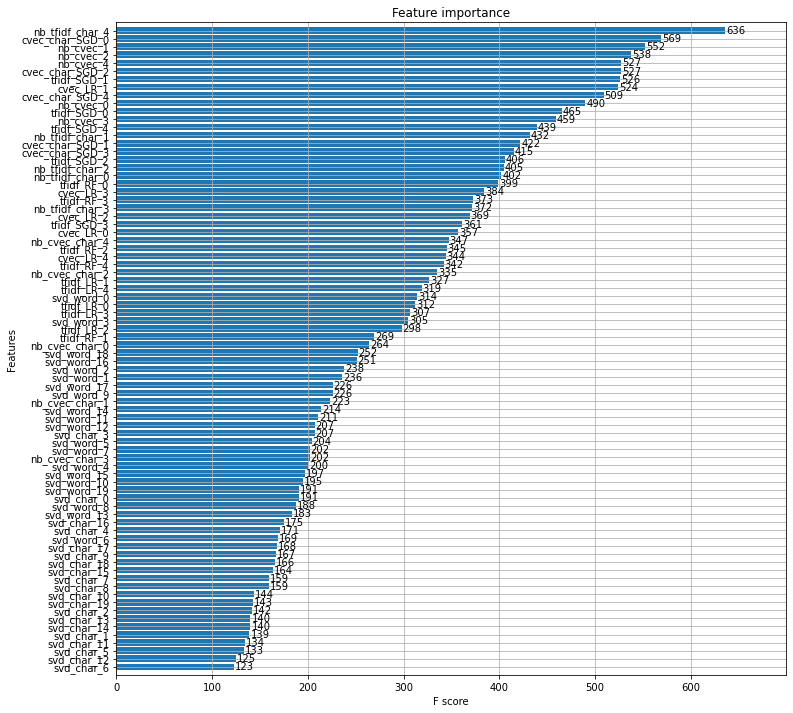

In [63]:
#Bonus? 

fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=80, height=0.8, ax=ax)
plt.show()